In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [3]:
# labels for type of flower
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Clustering

### 1) Ward Method

In [4]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
# Ward is the default method
ward = AgglomerativeClustering(n_clusters = 3)
ward_predict = ward.fit_predict(iris.data)

### 2) Complete Linkage

In [5]:
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_pred = complete.fit_predict(iris.data)

### 3) Average Linkage

In [6]:
average = AgglomerativeClustering(n_clusters=3, linkage='average')
average_pred = average.fit_predict(iris.data)

To determine which clustering result better matches the original labels of the samples, we can use adjusted_rand_score which is an external cluster validation index which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

Cluster validation indices are discussed later in the course

In [7]:
from sklearn.metrics import adjusted_rand_score

# Ward Score
ward_score = adjusted_rand_score(iris.target, ward_predict)

# Complete Linkage Score
complete_score = adjusted_rand_score(iris.target, complete_pred)

# Average Linkage Score
average_score = adjusted_rand_score(iris.target, average_pred)

In [8]:
print( "Scores: \nWard:", ward_score,"\nComplete: ", complete_score, "\nAverage: ", average_score)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522


# Normalization on Clustering

In [9]:
iris.data[:15]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2]])

Looking at this, we can see that the forth column has smaller values than the rest of the columns, and so its variance counts for less in the clustering process (since clustering is based on distance). Let us normalize the dataset so that each dimension lies between 0 and 1, so they have equal weight in the clustering process.

This is done by subtracting the minimum from each column then dividing the difference by the range.

sklearn provides us with a useful utility called preprocessing.normalize() that can do that for us

In [10]:
from sklearn.preprocessing import normalize

normalized_X = normalize(iris.data)
normalized_X[:15]

array([[ 0.80377277,  0.55160877,  0.22064351,  0.0315205 ],
       [ 0.82813287,  0.50702013,  0.23660939,  0.03380134],
       [ 0.80533308,  0.54831188,  0.2227517 ,  0.03426949],
       [ 0.80003025,  0.53915082,  0.26087943,  0.03478392],
       [ 0.790965  ,  0.5694948 ,  0.2214702 ,  0.0316386 ],
       [ 0.78417499,  0.5663486 ,  0.2468699 ,  0.05808704],
       [ 0.78010936,  0.57660257,  0.23742459,  0.0508767 ],
       [ 0.80218492,  0.54548574,  0.24065548,  0.0320874 ],
       [ 0.80642366,  0.5315065 ,  0.25658935,  0.03665562],
       [ 0.81803119,  0.51752994,  0.25041771,  0.01669451],
       [ 0.80373519,  0.55070744,  0.22325977,  0.02976797],
       [ 0.786991  ,  0.55745196,  0.26233033,  0.03279129],
       [ 0.82307218,  0.51442011,  0.24006272,  0.01714734],
       [ 0.8025126 ,  0.55989251,  0.20529392,  0.01866308],
       [ 0.81120865,  0.55945424,  0.16783627,  0.02797271]])

In [11]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(normalized_X)


ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


# Dendogram Visualization with Scipy

In [14]:
from scipy.cluster.hierarchy import linkage

linkage_type = 'ward'

linkage_matrix = linkage(normalized_X, linkage_type)

#### Plotting Dendogram using scipy's dendogram function

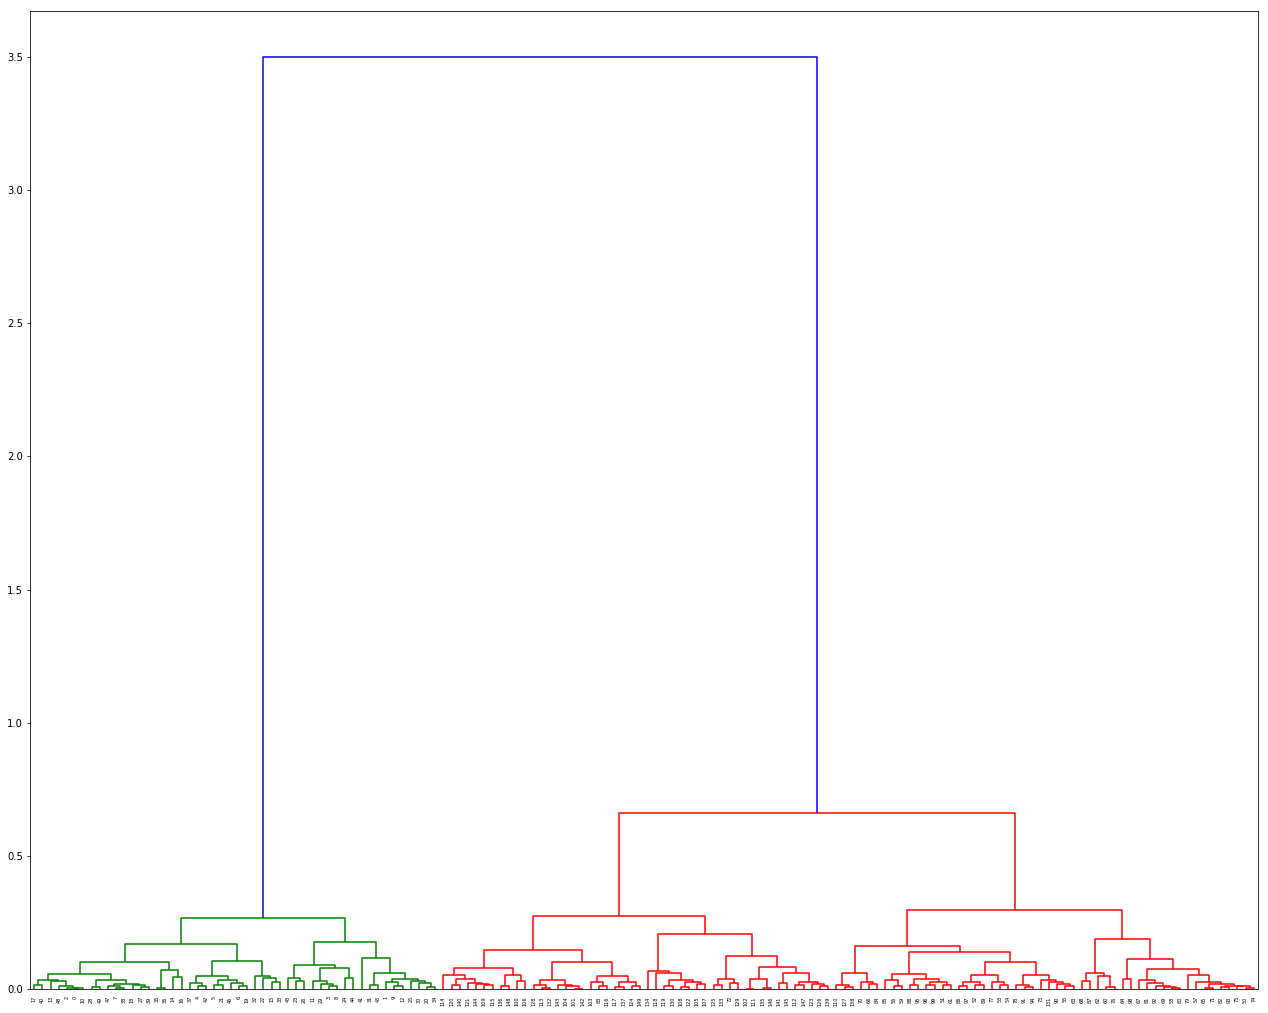

In [16]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

# Visualizing with Seaborn's clustermap

The seaborn plotting library for python can plot a clustermap, which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

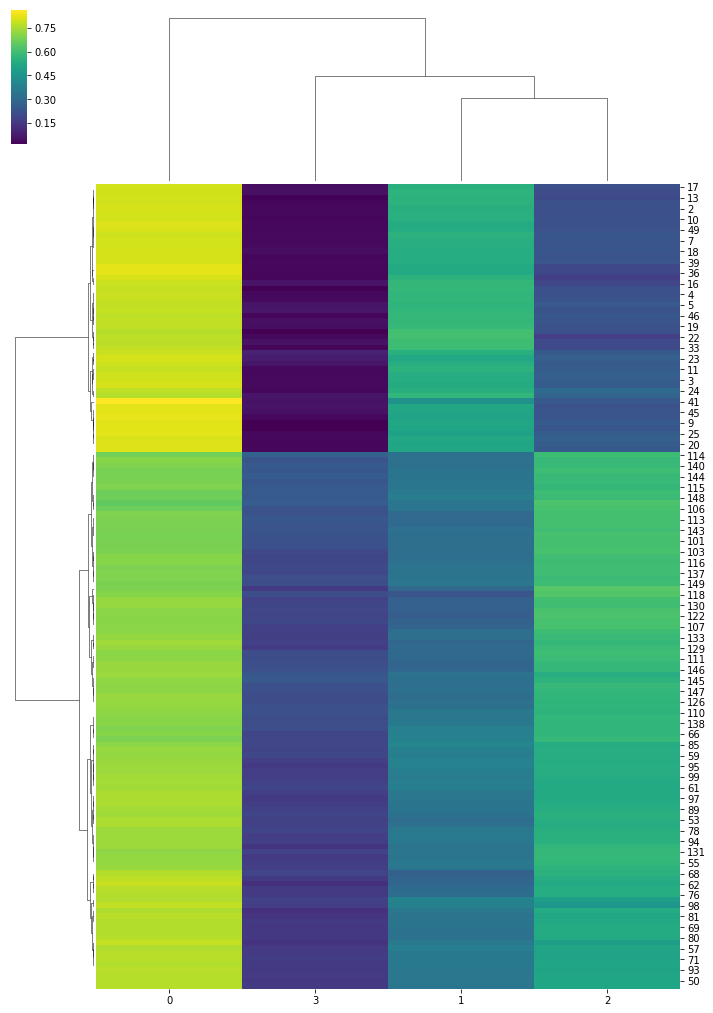

In [20]:
import seaborn as sns

sns.clustermap(normalized_X, figsize=(12, 18), method=linkage_type, cmap='viridis')

plt.show()

Looking at the colors of the dimensions can you observe how they differ between the three type of flowers? You should at least be able to notice how one is vastly different from the two others (in the top third of the image).